In [4]:
from PIL import Image
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
from pythonlibs.torch_lib1 import *

In [13]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

False
학습을 진행하는 기기: cpu


In [1]:
data_dir = 'C:/Users/신상민/OneDrive - 충북대학교/바탕 화면/이미지 학습/footballteam'

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [5]:
# 검증 데이터용: 정규화만을 실시
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])


# 학습 데이터용: 정규화에 RandomHorizontalFlip 과 RandomErasing 을 추가로 실시
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)   
])
train_data = datasets.ImageFolder(train_dir,transform = test_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# dataloader 정의
batch_size = 5
#train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

In [6]:
test_data.__getitem__(5)

(tensor([[[-0.0745, -0.1059, -0.2078,  ...,  0.1922, -0.6863, -0.9059],
          [-0.0980, -0.1529, -0.3098,  ..., -0.3725, -0.8667, -0.9294],
          [-0.1294, -0.2000, -0.2863,  ..., -0.6784, -0.9216, -0.9059],
          ...,
          [-0.4118, -0.4353, -0.4275,  ..., -0.3882, -0.3098, -0.2314],
          [-0.4353, -0.4353, -0.4196,  ..., -0.4275, -0.3647, -0.2784],
          [-0.5137, -0.4980, -0.4667,  ..., -0.4667, -0.3804, -0.3176]],
 
         [[-0.9922, -0.9686, -0.9765,  ..., -0.0039, -0.8118, -0.9608],
          [-0.9922, -0.9686, -0.9765,  ..., -0.5529, -0.9686, -0.9608],
          [-0.9843, -0.9765, -0.9686,  ..., -0.8431, -0.9922, -0.9216],
          ...,
          [-0.5373, -0.5608, -0.5451,  ..., -0.7725, -0.7255, -0.6706],
          [-0.5529, -0.5608, -0.5373,  ..., -0.7882, -0.7647, -0.7098],
          [-0.6235, -0.6078, -0.5843,  ..., -0.8039, -0.7647, -0.7333]],
 
         [[-0.9137, -0.9059, -0.9294,  ..., -0.4902, -0.9137, -0.9451],
          [-0.8902, -0.8902,

In [7]:
len(train_data)

67

In [8]:
classes = train_data.classes
classes

['Aston Villa', 'Bournemouth', 'Burnley']

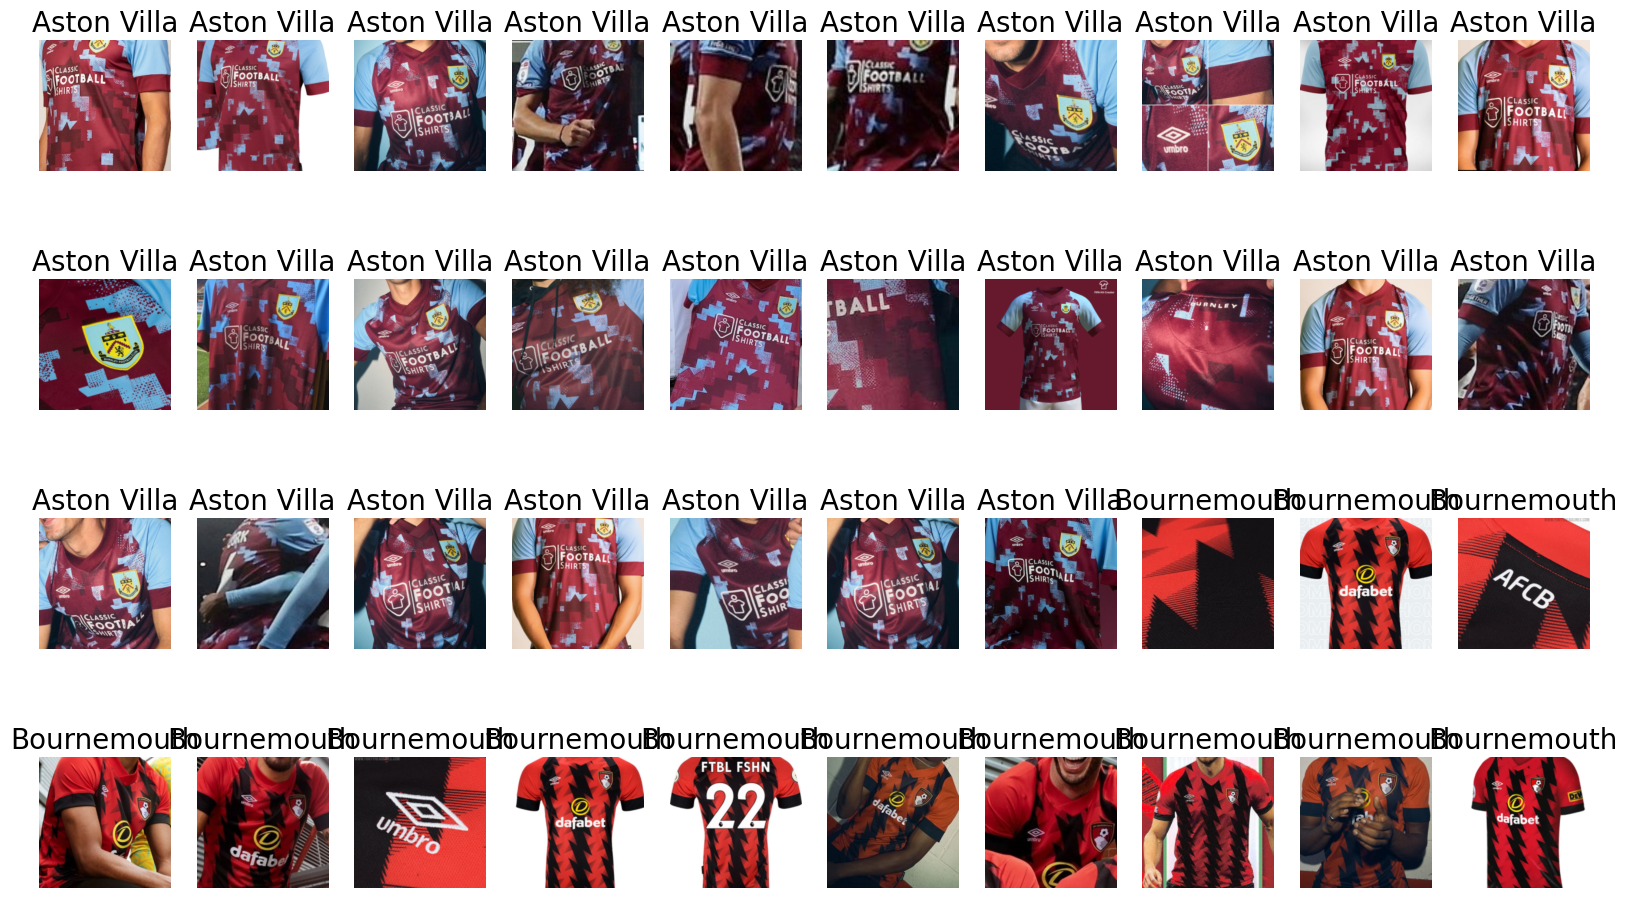

In [9]:
show_images_labels(train_loader2, classes, None, None)

IndexError: list index out of range

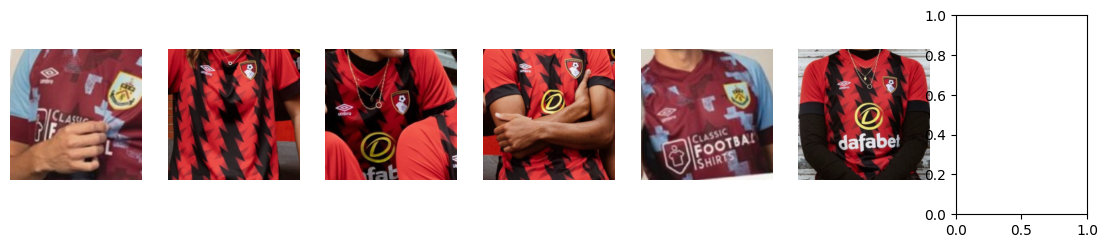

In [10]:
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

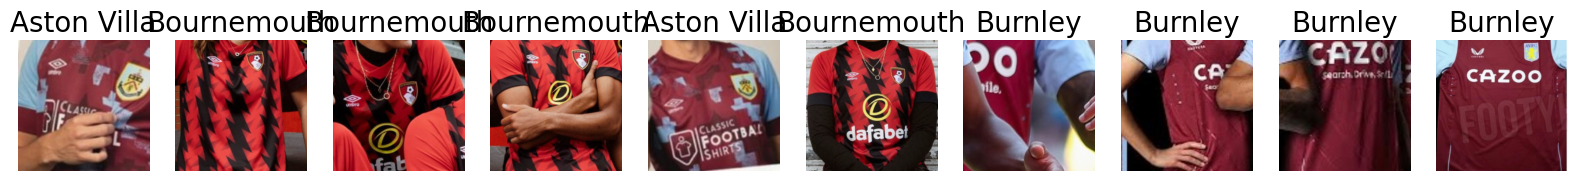

In [14]:
# 검증용 데이터 (10건)
# 이것이 정답 데이터 입니다.
# 10건 중 몇 건의 정답을 맞췄습니까.
torch_seed()
show_images_labels(test_loader2, classes, None, None)


In [15]:
# 사전에 학습이 끝난 모델을 이용해서 모델을 구축 (11장)

# 사전에 학습이 끝난 모델 읽어오기
from torchvision import models
net = models.vgg19_bn(pretrained = True)

# 전이 학습을 위해 required_grad 그래프를 False 로 설정
for param in net.parameters():
    param.requires_grad = False

# 난수 고정
torch_seed()

# 마지막 노드의 출력을 2로 변경
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# AdaptiveAvgPool2d 함수 제거
net.avgpool = nn.Identity()

# GPU 사용
net = net.to(device)

# 학습률
lr = 0.001

# 손실 함수로 교차 엔트로피 사용
criterion = nn.CrossEntropyLoss()

# 최적화함수 정의

# 파라미터 수정 대상을 마지막 노드로 제한함
optimizer = optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

# history 파일을 동시에 초기화
history = np.zeros((0, 5))

In [16]:
# 학습(9장)
# 반복 횟수
num_epochs = 10

# 학습 (공통함수)
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/14 [00:00<?, ?it/s]

IndexError: Target 2 is out of bounds.

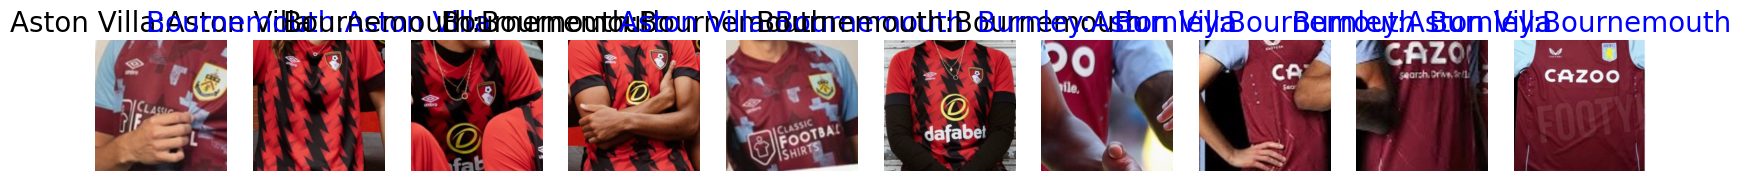

In [17]:
# 검증 데이터를 대상으로 결과 확인 (9장 공통함수)
torch_seed()
show_images_labels(test_loader2, classes, net, device)